<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/projects/teaidentifier/TeaClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive & set working directory
# requires auth (click on url & copy token into text box when prompted)
from google.colab import drive
drive.mount("/content/gdrive")

import os
print(os.getcwd())

os.chdir('/content/gdrive/My Drive/Colab Notebooks/TeaClassifier')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks/TeaClassifier


In [2]:
# _URL = 'https://drive.google.com/uc?export=download&id=16rqDFLO__WySSQGlAht0FEj2uJZg4M9M'

# path_to_zip = tf.keras.utils.get_file('input.zip',
#                                       origin=_URL,
#                                       extract=True)

# working directory
main_dir = os.getcwd()
print("Working directory: ", main_dir)


Working directory:  /content/gdrive/My Drive/Colab Notebooks/TeaClassifier


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D


In [16]:
'''Setting up the env'''
  
train_dir = main_dir + '/raw_images/train/'
test_dir = main_dir + '/raw_images/test1/'

print(train_dir, ', ', test_dir)

/content/gdrive/My Drive/Colab Notebooks/TeaClassifier/raw_images/train/ ,  /content/gdrive/My Drive/Colab Notebooks/TeaClassifier/raw_images/test1/


/content/gdrive/My Drive/Colab Notebooks/TeaClassifier/raw_images/train/
tea.train.1 (495).jpg


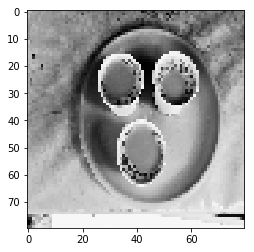

In [17]:
path = train_dir
print(path)

for p in os.listdir(path):
    print(p)
    category = p.split(".")[0]
    try:
        img_array = cv2.imread(os.path.join(path, p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        plt.imshow(new_img_array,cmap="gray")
    except Exception as e:
        print(str(e))
    break

In [0]:
X = []
y = []
convert = lambda category : int(category == 'tea')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)


In [0]:
#Normalize data
X = X/255.0

In [0]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Train on 1009 samples, validate on 253 samples
Epoch 1/10
1009/1009 [==============================] - 1s 573us/sample - loss: 0.2625 - acc: 0.9316 - val_loss: 0.2187 - val_acc: 0.9486
Epoch 2/10
1009/1009 [==============================] - 0s 374us/sample - loss: 0.2000 - acc: 0.9534 - val_loss: 0.2344 - val_acc: 0.9486
Epoch 3/10
1009/1009 [==============================] - 0s 365us/sample - loss: 0.2080 - acc: 0.9534 - val_loss: 0.2018 - val_acc: 0.9486
Epoch 4/10
1009/1009 [==============================] - 0s 378us/sample - loss: 0.1770 - acc: 0.9534 - val_loss: 0.1859 - val_acc: 0.9486
Epoch 5/10
1009/1009 [==============================] - 0s 369us/sample - loss: 0.1595 - acc: 0.9534 - val_loss: 0.2056 - val_acc: 0.9486
Epoch 6/10
1009/1009 [==============================] - 0s 372us/sample - loss: 0.1648 - acc: 0.9534 - val_loss: 0.1864 - val_acc: 0.9486
Epoch 7/10
1009/1009 [==============================] - 0s 381us/sample - loss: 0.1565 - acc: 0.9534 - val_loss: 0.1885 - val

In [0]:
path = test_dir
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [0]:
predictions = model.predict(X_test)


In [0]:
predicted_val = [int(round(p[0])) for p in predictions]


In [0]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)
